In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('Google_train_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
data["Close"] = pd.to_numeric(data["Close"], errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
Y_train = []
for i in range (60,1149):
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])

X_train,Y_train = np.array(X_train),np.array(Y_train)
X_train.shape


(1089, 60)

In [8]:
X_train = np.expand_dims(X_train, -1)
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss="mean_squared_error")


In [10]:
hist = model.fit(X_train,Y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
35/35 - 11s - loss: 0.0428 - 11s/epoch - 305ms/step
Epoch 2/20
35/35 - 5s - loss: 0.0117 - 5s/epoch - 149ms/step
Epoch 3/20
35/35 - 5s - loss: 0.0097 - 5s/epoch - 156ms/step
Epoch 4/20
35/35 - 5s - loss: 0.0092 - 5s/epoch - 147ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0078 - 5s/epoch - 152ms/step
Epoch 6/20
35/35 - 5s - loss: 0.0085 - 5s/epoch - 149ms/step
Epoch 7/20
35/35 - 5s - loss: 0.0069 - 5s/epoch - 151ms/step
Epoch 8/20
35/35 - 5s - loss: 0.0066 - 5s/epoch - 150ms/step
Epoch 9/20
35/35 - 6s - loss: 0.0060 - 6s/epoch - 169ms/step
Epoch 10/20
35/35 - 6s - loss: 0.0068 - 6s/epoch - 160ms/step
Epoch 11/20
35/35 - 5s - loss: 0.0065 - 5s/epoch - 156ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0058 - 5s/epoch - 151ms/step
Epoch 13/20
35/35 - 5s - loss: 0.0059 - 5s/epoch - 155ms/step
Epoch 14/20
35/35 - 6s - loss: 0.0061 - 6s/epoch - 160ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 191ms/step
Epoch 16/20
35/35 - 6s - loss: 0.0062 - 6s/epoch - 162ms/step
Epoch 17/20
35/

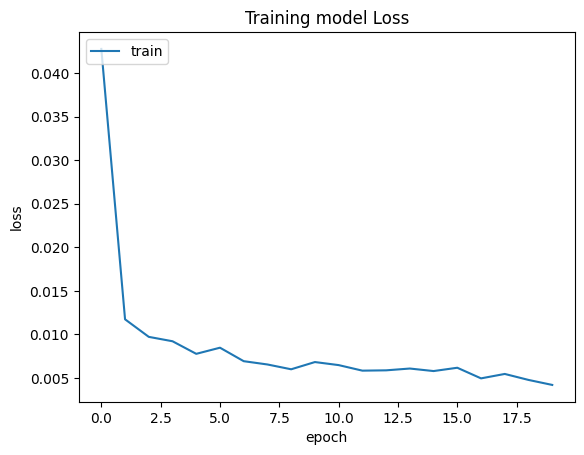

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [17]:
testData = pd.read_csv('Google_test_data.csv')
testData['Close']= pd.to_numeric(testData['Close'], errors='coerce')
testData= testData.dropna()
testData= testData.iloc[:,4:5]
Y_test = testData.iloc[60:,0:].values

#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape

X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])

X_test = np.array(X_test)
X_test = np.expand_dims(X_test, -1)
X_test.shape



(192, 60, 1)

In [19]:
Y_pred = model.predict(X_test)
Y_pred

6/6 [==============================] - 0s 44ms/step


array([[1.0897841 ],
       [1.0939891 ],
       [1.106208  ],
       [1.1239505 ],
       [1.1382213 ],
       [1.1384461 ],
       [1.1248224 ],
       [1.105643  ],
       [1.0927997 ],
       [1.0891037 ],
       [1.0830216 ],
       [1.0727499 ],
       [1.0634155 ],
       [1.0549684 ],
       [1.0535946 ],
       [1.0588847 ],
       [1.0774003 ],
       [1.1062573 ],
       [1.1389875 ],
       [1.1708758 ],
       [1.1833282 ],
       [1.1782925 ],
       [1.1554936 ],
       [1.1236625 ],
       [1.0951394 ],
       [1.0789559 ],
       [1.0755368 ],
       [1.0765489 ],
       [1.0715151 ],
       [1.0623415 ],
       [1.0516297 ],
       [1.0392522 ],
       [1.0205183 ],
       [0.99719185],
       [0.9880844 ],
       [0.9986703 ],
       [1.0220966 ],
       [1.0486226 ],
       [1.0731809 ],
       [1.0854995 ],
       [1.0965763 ],
       [1.1097627 ],
       [1.1253211 ],
       [1.1398647 ],
       [1.1492627 ],
       [1.1491122 ],
       [1.137684  ],
       [1.126

In [20]:
predicted_price = sc.inverse_transform(Y_pred)

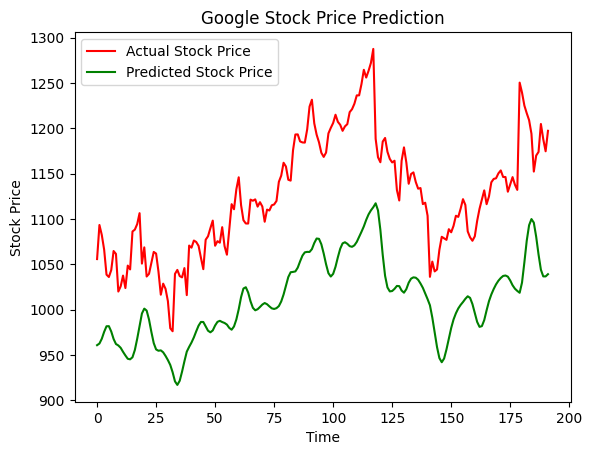

In [21]:
plt.plot(Y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label="Predicted Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()